**Optimización de Inventarios y Análisis de Sostenibilidad**

**Objetivos:**

* Minimizar los residuos mediante la optimización de los niveles de inventario.
* Identificar las estrategias de compra más eficientes basadas en datos de ventas, aprovisionamiento e inventario.
* Evaluar el rendimiento de las ventas de productos para formular un enfoque de gestión sostenible del inventario.

**1. Preprocesamiento de datos:**  
* Consolidar todos los archivos CSV en un conjunto de datos maestro unificado.  
* Búsqueda de entradas erróneas o que falten.  
* Normalizar los formatos de fecha para un análisis coherente de las series temporales.

**2. Análisis de inventario:**
* Evaluar el estado del inventario al principio y al final del año utilizando BegInvFINAL12312016.csv y EndInvFINAL12312016.csv.  
* Identificar los productos con mayor y menor presencia en el inventario.


**3. Análisis de Ventas:**
* Examinar SalesFINAL12312016.csv para identificar los productos más vendidos y los productos con ventas lentas.
* Analizar las tendencias de ventas a lo largo del tiempo, considerando variables como cantidad de ventas, precio de venta y fecha.


**4. Análisis de compras:**
* Evaluar las actividades de compra utilizando PurchasesFINAL12312016.csv y InvoicePurchases12312016.csv.
* Investigar los volúmenes de compra a diferentes proveedores, los costos de aprovisionamiento y los procesos de la cadena de suministro.

**5. Cálculo del nivel óptimo de existencias:**
* Determinar el nivel óptimo de existencias para cada producto aprovechando los datos de ventas, aprovisionamiento e inventario.
* Proponer niveles de existencias adaptados a la velocidad de venta de los productos y a los plazos de suministro.

**Conclusion:**  
La información derivada de estos análisis proporcionará recomendaciones para gestionar el inventario de forma más eficiente y sostenible, con el objetivo de reducir costes y evitar el exceso de existencias y los residuos.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Utiliza el método pd.read_csv() de la librería Pandas para leer archivos CSV desde rutas específicas en el sistema local.
purchase_prices = pd.read_csv('D:\\Documentos\\Gestion_Inventario\\ArchivosCVSOriginales\\2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('D:\\Documentos\\Gestion_Inventario\\ArchivosCVSOriginales\\BegInvFINAL12312016.csv')
end_inv = pd.read_csv('D:\\Documentos\\Gestion_Inventario\\ArchivosCVSOriginales\\EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('D:\\Documentos\\Gestion_Inventario\\ArchivosCVSOriginales\\InvoicePurchases12312016.csv')
purchases = pd.read_csv('D:\\Documentos\\Gestion_Inventario\\ArchivosCVSOriginales\\PurchasesFINAL12312016.csv')
sales = pd.read_csv('D:\\Documentos\\Gestion_Inventario\\ArchivosCVSOriginales\\SalesFINAL12312016.csv')

In [ ]:
# Este código imprime los nombres de las columnas de varias tablas o dataframes de pandas. 
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [4]:
# Este código verifica si hay datos faltantes (missing values) en varios conjuntos de datos (datasets),
# y muestra la cantidad de valores nulos por columna en aquellos que tienen datos faltantes.
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)



Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in invoice_purchases:
Approval    5169
dtype: int64

Missing values in purchases:
Size    3
dtype: int64


El tratamiento de los valores perdidos es un paso fundamental en el análisis de datos. Los distintos segmentos de datos pueden requerir estrategias diferentes. Analizamos en colaboración cada conjunto de datos y decidimos el curso de acción paa nuestro concepto más adecuado:

**purchase_prices:** precios de compra
* **Description, Size, and Volume:** Aquí falta un número limitado de entradas. Tenemos algunas opciones: eliminar estas filas específicas o, para un enfoque más informado, sustituir estos vacíos por el valor más comúnmente observado (modo). Optamos por eliminar estas filas   

**end_inv:**
* City: Una solución inmediata podría ser sustituir las entradas «Ciudad» que faltan por la ciudad más frecuente (modo). Sin embargo, si nuestra columna 'Tienda' tiene información sobre la ubicación, podríamos considerar utilizarla para un relleno más informado. Si nada de esto funciona, lo mejor será marcarlas como «Desconocidas». Probaremos con la columna «Tienda»..   

**invoice_purchases:** factura de compras
* Approval: Aprobación: Si interpretamos «Aprobación» como un indicador binario (por ejemplo, Aprobado/No Aprobado), las ausencias podrían indicar que el estado de estas facturas aún no se ha decidido. Podemos clasificarlas como «Pendiente» o «Desconocida» para mayor claridad.  .  

**purchases:** compras
* Size: Tamaño: Siguiendo nuestra estrategia con 'precios_compra', podemos descartar estas pocas filas..

In [6]:
# Tratamiento de los valores que faltan en el conjunto de datos purchase_prices
cols_to_check = ['Description', 'Size', 'Volume']
for col in cols_to_check:
    purchase_prices = purchase_prices[purchase_prices[col].notna()]

# Tratamiento de los valores que faltan en el conjunto de datos end_inv
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv.loc[end_inv['City'].isna(), 'City'] = end_inv['Store'].map(city_store_mapping)
else:
    end_inv['City'] = end_inv['City'].fillna('Unknown')

# Tratamiento de los valores que faltan en el conjunto de datos invoice_purchases
invoice_purchases['Approval'] = invoice_purchases['Approval'].fillna('Pending')

# Tratamiento de los valores que faltan en el conjunto de datos de compras
purchases = purchases[purchases['Size'].notna()]

datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nValores faltantes en {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo hay valores faltantes en {name}.")




No hay valores faltantes en purchase_prices.

No hay valores faltantes en beg_inv.

No hay valores faltantes en end_inv.

No hay valores faltantes en invoice_purchases.

No hay valores faltantes en purchases.

No hay valores faltantes en sales.


**2. Análisis de inventario:**

In [7]:
# Agrupando por Marca y Descripción y resumiendo el inventario para el comienzo del año
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Agrupando por Marca y Descripción y resumiendo el inventario para el final del año
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identificando los 5 productos principales al comienzo y al final del año
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identificando los 5 productos inferiores al comienzo y al final del año
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Los 5 productos principales al comienzo del año:\n", top_5_beg)
print("\nLos 5 productos principales al final del año:\n", top_5_end)
print("\nLos 5 productos inferiores al comienzo del año:\n", bottom_5_beg)
print("\nLos 5 productos inferiores al final del año:\n", bottom_5_end)


Los 5 productos principales al comienzo del año:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Los 5 productos principales al final del año:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Los 5 productos inferiores al comienzo del año:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Los 5 productos inferiores al final del año:
 Bra

**Insights:**  

**Principales productos:**
* "Ketel One Vodka" se convirtió en el producto estrella a finales de año, aunque al principio ocupaba la cuarta posición. Esto podría implicar un aumento de la demanda o de las existencias de este producto a lo largo del año.
* "Capt Morgan Spiced Rum", inicialmente el producto con mayor nivel de existencias a principios de año, perdió por poco la primera posición por una sola unidad a finales de año.
* "Smirnoff 80 Proof" parece haber sido objeto de una actualización o cambio de marca, ya que su número pasó de 3876 a 8111 a lo largo del año. A pesar de ello, su popularidad se mantiene.
* "Absolut 80 Proof"  se mantiene estable y sólo desciende un puesto de principio a fin de año..
* Un nuevo participante, "Jack Daniels No 7 Black", entró en el top 5 a finales de año, sustituyendo a «Maurice's Mentholated Mint» de principios de año.

**Productos más vendidos:**
* Es alarmante ver productos con existencias nulas tanto al principio como al final del año. Es posible que estos productos no hayan tenido existencias en todo el año o que se hayan agotado completamente y no se hayan repuesto.
* No hay un solapamiento significativo entre los 5 últimos productos de ambas listas, lo que indica que las existencias de los artículos con pocas existencias podrían fluctuar a lo largo del año.
* La presencia de vinos y productos de nicho en las listas inferiores sugiere que podría tratarse de artículos especiales con una demanda selectiva o una oferta limitada.

**Observaciones sobre la gestión de existencias:**
* La gran regularidad general de los principales productos sugiere una demanda constante y estrategias eficaces de reposición de existencias para los artículos más populares.
* Sin embargo, los recuentos constantes a cero tanto al principio como al final del año para determinados productos indican posibles problemas en la gestión de inventarios o en las adquisiciones.
* Vale la pena revisar la demanda de estos productos y determinar si tiene sentido comercial seguir ofreciéndolos o si puede haber problemas en la cadena de suministro que impidan su reposición.

**3. Análisis de ventas**

In [9]:
# Encontrando los productos más vendidos
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Los diez productos más vendidos:\n{best_selling_products}\n")

# Encontrando los productos de baja rotación
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Los diez productos de mas baja rotación:\n{slow_moving_products}")

Los diez productos más vendidos:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Los diez productos de mas baja rotación:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Cha

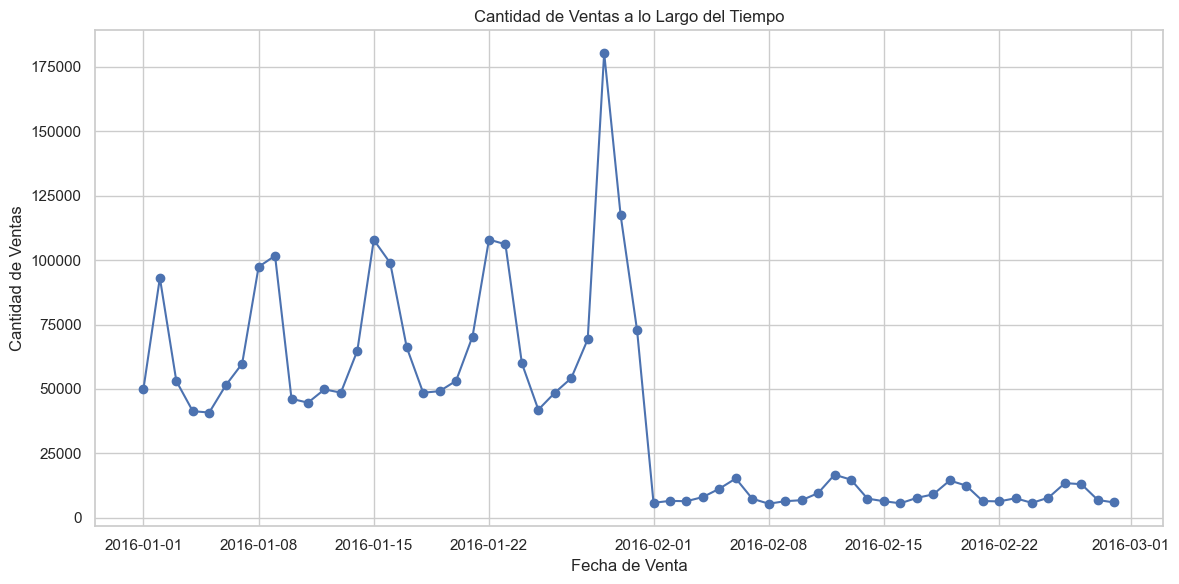

In [60]:
# Convertir 'SalesDate' a formato de fecha
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

# Agrupar por 'SalesDate' y sumar la cantidad de ventas
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'}).reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(sales_quantity_trend['SalesDate'], sales_quantity_trend['SalesQuantity'], marker='o')
plt.title('Cantidad de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha de Venta')
plt.ylabel('Cantidad de Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()



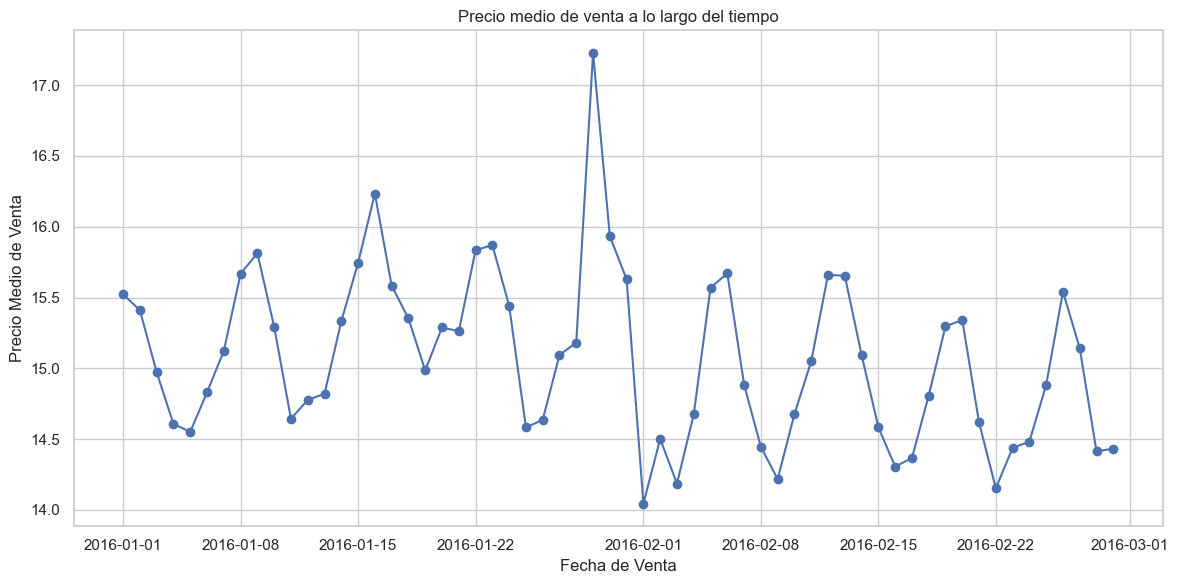

In [59]:
# Agrupar por fecha y calcular el promedio del precio de venta
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'}).reset_index()

# Graficar la tendencia del precio medio de venta a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(avg_price_trend['SalesDate'], avg_price_trend['SalesPrice'], marker='o')
plt.title('Precio medio de venta a lo largo del tiempo')
plt.xlabel('Fecha de Venta')
plt.ylabel('Precio Medio de Venta')
plt.grid(True)
plt.tight_layout()
plt.show()



1. Hay un carácter cíclico en las cantidades vendidas, lo que podría indicar patrones o tendencias semanales.    
1. Sin embargo, a medida que avanzan los dias en el mes de febrero, se produce un notable descenso de las ventas, que parece estabilizarse a medida que avanza el mes.
1. Por otro lado, varios productos se mueven con lentitud, lo que indica unas ventas limitadas. Como estos productos varían en cuanto a tipo y marca, podría ser necesaria una revisión estratégica para decidir sobre su permanencia en almacén.

**4. Análisis de Compra**

In [ ]:
# Este código analiza el volumen de compras realizadas a los proveedores (VendorName) y muestra los 10 proveedores con mayores volúmenes de compra.
vendor_purchase_volume = invoice_purchases.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Los 10 principales proveedores por volumen de compras:\n", vendor_purchase_volume.head(10))

Los 10 principales proveedores por volumen de compras:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


In [16]:
# Este código analiza el costo total de las compras realizado a cada proveedor (VendorName) y muestra los 10 proveedores con los costos más altos.
vendor_purchase_cost = purchases.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Los 10 principales proveedores por costo de compra:\n", vendor_purchase_cost.head(10))


Los 10 principales proveedores por costo de compra:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        3919293.52
JIM BEAM BRANDS COMPANY         2445075.37
PERNOD RICARD USA               2002210.70
MARTIGNETTI COMPANIES           1954748.37
ULTRA BEVERAGE COMPANY LLP      1328577.74
CONSTELLATION BRANDS INC        1316920.86
BACARDI USA INC                 1309369.34
E & J GALLO WINERY              1179960.50
BROWN-FORMAN CORP               1089218.08
M S WALKER INC                   979018.30


**Principales proveedores por costo de compra:**
* DIAGEO NORTH AMERICA INC es el principal proveedor con el mayor costo de compra, que asciende a 3.919.293,52 dólares.
* Los dos proveedores siguientes, 'JIM BEAM BRANDS COMPANY' y 'PERNOD RICARD USA', tienen unos costos de compra de 2.445.075,37 y 2.002.210,70 dólares, respectivamente
* Es interesante ver que los 10 primeros vendedores tienen una diferencia significativa en sus costos de compra, con 'DIAGEO NORTH AMERICA INC' en primer lugar con un margen de 1,5 millones de dolares respecto al vendedor que ocupa la segunda posición

In [ ]:
# Paso 1: Convertir las columnas PODate y ReceivingDate al formato datetime
# Esto asegura que las fechas sean interpretadas correctamente por Python.
# Si hay fechas mal formateadas, se convertirán en NaT (Not a Time) gracias a `errors='coerce'`.
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')

# Paso 2: Verificar si hay valores nulos en las columnas PODate o ReceivingDate
# Esto identifica si alguna fecha fue inválida durante la conversión.
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    # Si hay valores nulos, muestra un mensaje para alertar sobre entradas de fechas no válidas.
    print("Hay entradas de fechas no válidas en el conjunto de datos. Por favor revise los datos.")
else:
    # Paso 3: Calcular la duración del suministro (SupplyDuration)
    # Esto representa el tiempo en días entre la fecha de orden de compra y la fecha de recepción.
    purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

    # Paso 4: Calcular la duración promedio del suministro en días
    # Utiliza la media (mean) de la columna SupplyDuration para calcular el promedio.
    average_supply_duration = round(purchases['SupplyDuration'].mean(), 1)
    
    # Paso 5: Mostrar el resultado de la duración promedio del suministro
    # Imprime el promedio redondeado a un decimal para que sea más claro y legible.
    print("Duración promedio del suministro (en días):", average_supply_duration)


Duración promedio del suministro (en días): 7.6


In [ ]:
# Paso 1: Convertir las columnas InvoiceDate y PayDate al formato datetime
# Esto asegura que las fechas sean interpretadas correctamente por Python.
# Si alguna fecha no es válida, se convertirá en NaT (Not a Time).
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])

# Paso 2: Calcular la duración del pago (PaymentDuration)
# Se calcula la diferencia entre la fecha de pago (PayDate) y la fecha de factura (InvoiceDate).
# El resultado es en días, ya que se utiliza `.dt.days` para obtener el número de días.
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days

# Paso 3: Calcular la duración promedio del pago en días
# Se calcula la media (mean) de la columna PaymentDuration para obtener el promedio.
average_payment_duration = round(purchases['PaymentDuration'].mean(), 1)

# Paso 4: Mostrar el resultado de la duración promedio del pago
# Imprime el promedio redondeado a un decimal para que sea más fácil de interpretar.
print("Duración promedio del pago (en días):", average_payment_duration)



Duración promedio del pago (en días): 35.7


**Plazos de suministro y pago:**. 
* Por término medio, el proceso de suministro dura aproximadamente 7,6 días, lo que indica un plazo relativamente rápido para recibir los productos tras realizar un pedido.
* Sin embargo, la duración media de los pagos es de 35,7 días. Esto podría significar que se han acordado condiciones de crédito más largas con los proveedores o que se ha producido algún retraso en el proceso de pago.    


In [22]:
# identificar cuáles son los proveedores que han generado el mayor volumen de compras basado en el precio de compra total
reduced_purchases = purchases[['VendorName', 'PurchasePrice']]
top_vendors = reduced_purchases.groupby('VendorName').sum()['PurchasePrice'].nlargest(10)
print(top_vendors)



VendorName
DIAGEO NORTH AMERICA INC       3919293.52
JIM BEAM BRANDS COMPANY        2445075.37
PERNOD RICARD USA              2002210.70
MARTIGNETTI COMPANIES          1954748.37
ULTRA BEVERAGE COMPANY LLP     1328577.74
CONSTELLATION BRANDS INC       1316920.86
BACARDI USA INC                1309369.34
E & J GALLO WINERY             1179960.50
BROWN-FORMAN CORP              1089218.08
M S WALKER INC                  979018.30
Name: PurchasePrice, dtype: float64


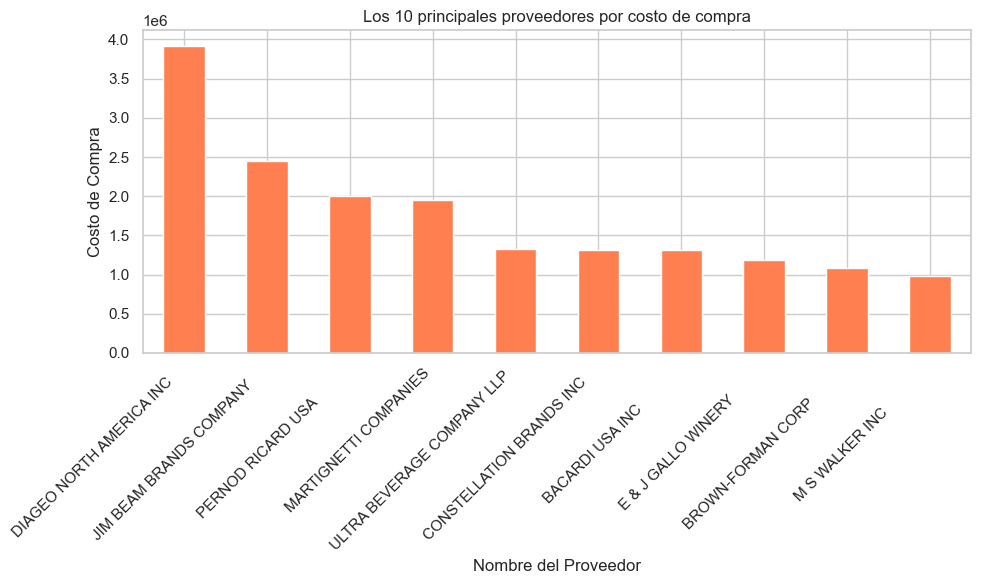

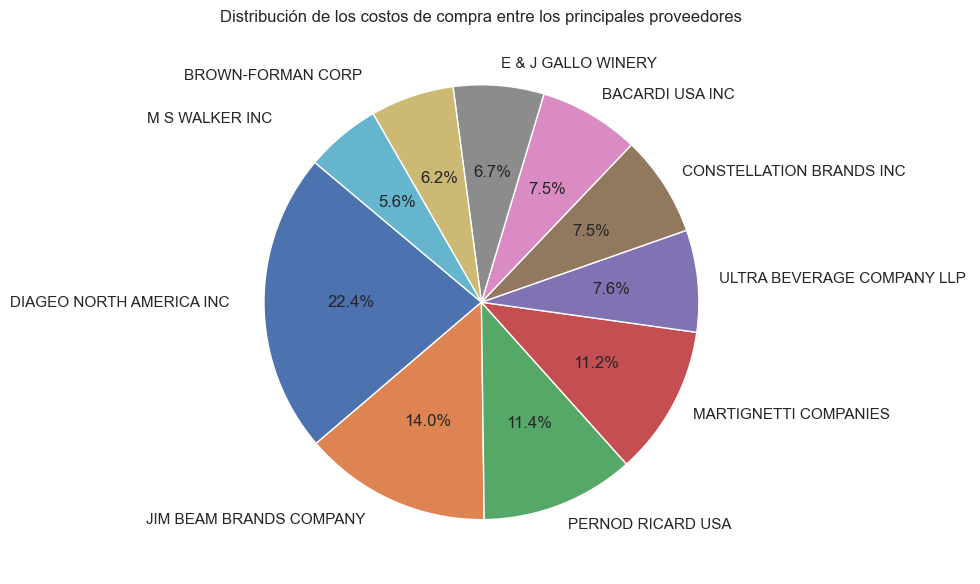

In [58]:
# Objetivo del gráfico de Barras es mostrar visualmente los datos de los 10 principales proveedores por costo de compra
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color='coral')
plt.title('Los 10 principales proveedores por costo de compra')
plt.ylabel('Costo de Compra')
plt.xlabel('Nombre del Proveedor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Objetivo del gráfico circular es mostrar la distribución porcentual de los costos de compra entre los 10 principales proveedores.
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='pie', y='Purchase Cost', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los costos de compra entre los principales proveedores')
plt.ylabel('')  # para eliminar la etiqueta predeterminada 'PurchasePrice' del eje y
plt.tight_layout()
plt.show()


El gráfico de barras ilustra los 10 principales proveedores por costo de compra. Observamos que "DIAGEO NORTH AMERICA INC" claramente domina, con un costo de compra significativamente más alto en comparación con los demás. Los otros proveedores, como "JIM BEAM BRANDS COMPANY" y "PERNOD RICARD USA", tienen una distribución más consistente, mostrando un gasto equilibrado entre ellos.

Al pasar al gráfico circular, que proporciona una distribución de los costos de compra entre los principales proveedores, obtenemos una visión más detallada. "DIAGEO NORTH AMERICA INC" representa el 22.4% del total de los costos de compra entre los principales proveedores. Los otros proveedores tienen porcentajes que van del 5.6% al 14%, lo que indica una distribución de costos más uniforme entre ellos.

En conclusión, aunque hay un proveedor dominante en términos de costo de compra, la distribución general entre los principales proveedores es relativamente uniforme, con solo unos pocos casos atípicos. Esto sugiere una estrategia de proveedores diversificada, pero con algunas asociaciones preferidas.

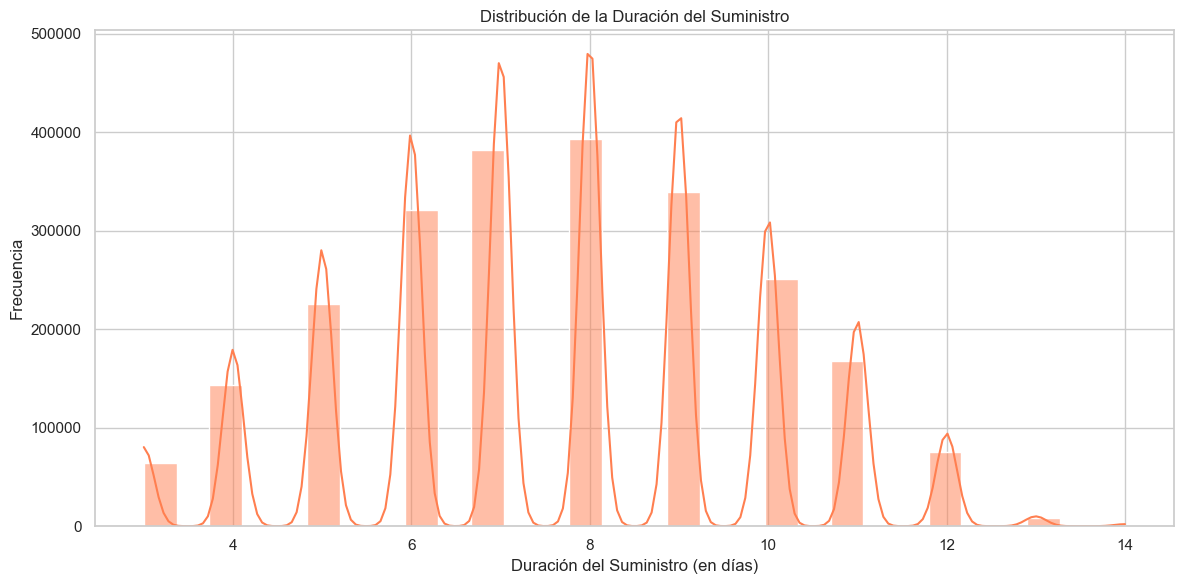

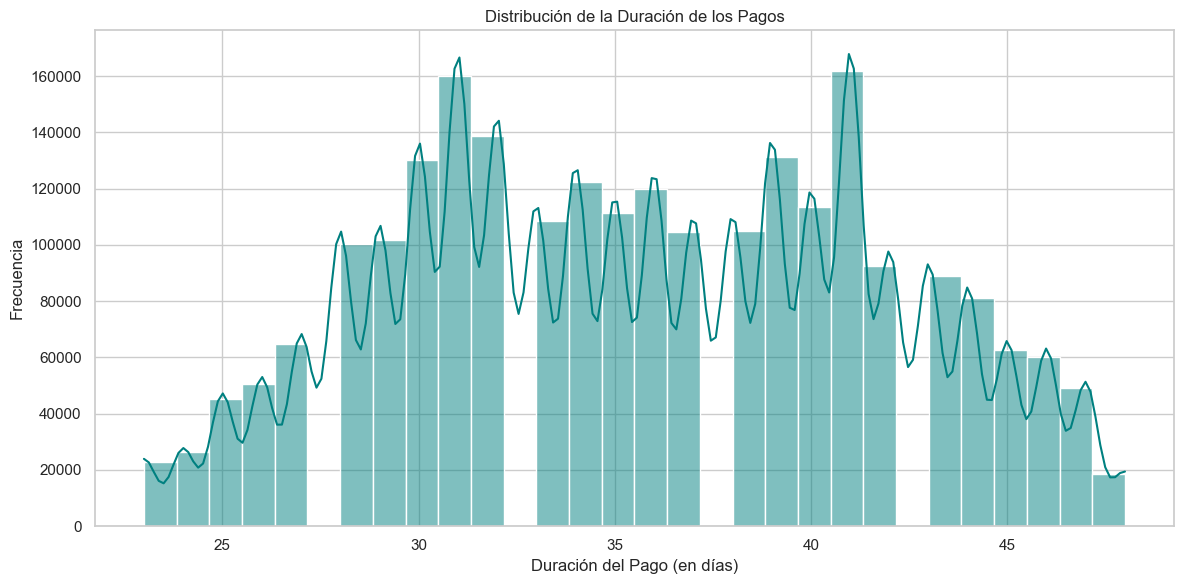

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustes de estilo
sns.set_style("whitegrid")

# Histograma de la duración del suministro
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='coral')
plt.title('Distribución de la Duración del Suministro')
plt.xlabel('Duración del Suministro (en días)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Histograma de la duración del pago
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='teal')
plt.title('Distribución de la Duración de los Pagos')
plt.xlabel('Duración del Pago (en días)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



Observaciones:
* Los intervalos regulares observados en el gráfico de duración del suministro sugieren que podría haber ciclos de suministro específicos o cronogramas de reabastecimiento que detallamos a continuación.
* **Los picos en la distribución del suministro, particularmente alrededor de 4, 6, 8, 10 y 12 días, podrían indicar duraciones estándar de contratos de suministro o períodos preferidos de reabastecimiento.**
* **La oscilación en las duraciones de pago, especialmente entre 25 y 45 días, sugiere variabilidad en los términos de pago o posibles inconsistencias en la ejecución de los pagos.**

In [29]:
# Calculando información relacionada con el nivel de inventario recomendado para cada producto,
# considerando la velocidad de ventas y el tiempo de entrega de los productos:

# 1. Calcular la duración total de ventas:
start_date = sales['SalesDate'].min()  # Fecha más temprana de ventas
end_date = sales['SalesDate'].max()    # Fecha más tardía de ventas
total_days = (end_date - start_date).days  # Número total de días entre la primera y última venta

# 2. Calcular la velocidad de ventas de cada producto:
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days  # Ventas por día

# 3. Calcular el tiempo de entrega (Lead Time):
purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days # Calcular el tiempo de entrega
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()

# 4. Fusionar los datos de ventas y tiempos de entrega:
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')

# 5. Calcular el nivel de inventario óptimo:
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']

# 6. Calcular el stock de seguridad:
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')

# 7. Calcular el nivel de stock recomendado:
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

# 8. El código anterior debe producir varias salidas, pero como es una serie de cálculos almacenados en un DataFrame (merged_data),
# las salidas dependerán de cómo imprimas o visualices los resultados.
print(merged_data.head())

   Brand                  Description  Total_Sales  Sales_Per_Day  \
0     58  Gekkeikan Black & Gold Sake          288       4.881356   
1     60       Canadian Club 1858 VAP          124       2.101695   
2     61        Margaritaville Silver           24       0.406780   
3     62     Herradura Silver Tequila          162       2.745763   
4     63   Herradura Reposado Tequila          131       2.220339   

   Avg_Lead_Time  Optimal_Stock_Level  Max_Daily_Sales  Safety_Stock  \
0       7.758389            37.871459                7      2.118644   
1       7.659794            16.098550                3      0.898305   
2       8.115385             3.301173               12     11.593220   
3       7.331570            20.130751                3      0.254237   
4       7.324427            16.262712                4      1.779661   

   Recommended_Stock_Level  
0                39.990104  
1                16.996855  
2                14.894394  
3                20.384988  
4      

In [31]:
# Este código tiene como objetivo identificar productos cuya venta diaria promedio (Sales_Per_Day) supera las ventas diarias máximas (Max_Daily_Sales).
# Esto puede ser un indicador de que el inventario o la planificación de compras para estos productos es inadecuado.

# 1. Filtrar los productos problemáticos:
problematic_products = merged_data[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales']]

# 2. Contar el número de productos problemáticos:
num_problematic_products = len(problematic_products)

# 3. Imprimir el número de productos problemáticos:
print(f"Hay {num_problematic_products} productos donde el valor de Ventas_Por_Día es mayor que el valor de Ventas_Diarias_Maximas.")
# 4. Imprimir los detalles de los productos problemáticos:
if num_problematic_products > 0:
    print(problematic_products[['Brand', 'Description', 'Sales_Per_Day', 'Max_Daily_Sales']])

Hay 555 productos donde el valor de Ventas_Por_Día es mayor que el valor de Ventas_Diarias_Maximas.
      Brand                   Description  Sales_Per_Day  Max_Daily_Sales
7        77   Three Olives Espresso Vodka      15.389831                8
8        79      Three Olives Loopy Vodka       7.050847                5
76      273      Sauza Extra Gold Tequila      10.372881                9
139     482              Absolut 80 Proof      37.135593               23
142     497        Capt Morgan Spiced Rum      39.644068               38
...     ...                           ...            ...              ...
7426  44712    Sonoma-Cutrer Chard Sonoma      27.610169               25
7580  46379  Ghost Pine Cab Svgn LMartini      14.474576               12
7590  46447         Gascon Malbec Mendoza      22.796610               16
7592  46458      Layer Cake Barosa Shiraz       7.305085                7
7594  46476          Tilia Malbec Mendoza      26.169492               19

[555 rows x

**¿Qué indica esta salida?** La salida muestra cuántos productos están siendo vendidos a un ritmo más rápido que su capacidad máxima diaria de ventas registrada. Estos productos podrían necesitar un mayor stock o una revisión de la estrategia de compras y ventas para evitar desabastecimientos o ineficiencias en la gestión de inventarios.

In [56]:
# 1. Actualizar Max_Daily_Sales para productos problemáticos:
merged_data.loc[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['Sales_Per_Day']

# 2. Actualizar el stock de seguridad (Safety_Stock):
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']

# 3. Actualizar el nivel de stock recomendado (Recommended_Stock_Level):
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

En un contexto de gestión de inventarios, el Sales_Per_Day representa el número promedio de unidades vendidas por día, mientras que el Max_Daily_Sales representa el número más alto de unidades vendidas en un solo día para un producto dado. Lógicamente, el Max_Daily_Sales nunca debería ser menor que el Sales_Per_Day, ya que esto implicaría que las ventas diarias promedio son mayores que las ventas máximas registradas en un solo día, lo cual es contradictorio.

La ocurrencia de tal situación podría deberse a varias razones, incluyendo errores de entrada de datos, valores atípicos o errores computacionales. En nuestro conjunto de datos, observamos que había 555 productos con esta inconsistencia.

Para corregir esto, actualizamos el valor de Max_Daily_Sales para que sea igual al valor de Sales_Per_Day para estos productos problemáticos. Esto asegura que el Max_Daily_Sales sea al menos tan grande como las ventas diarias promedio, manteniendo así la consistencia lógica en el conjunto de datos.

Estos cálculos son importantes para mejorar la gestión de inventarios, asegurando que haya suficiente stock para satisfacer la demanda diaria promedio, considerando también posibles variaciones o picos en las ventas.

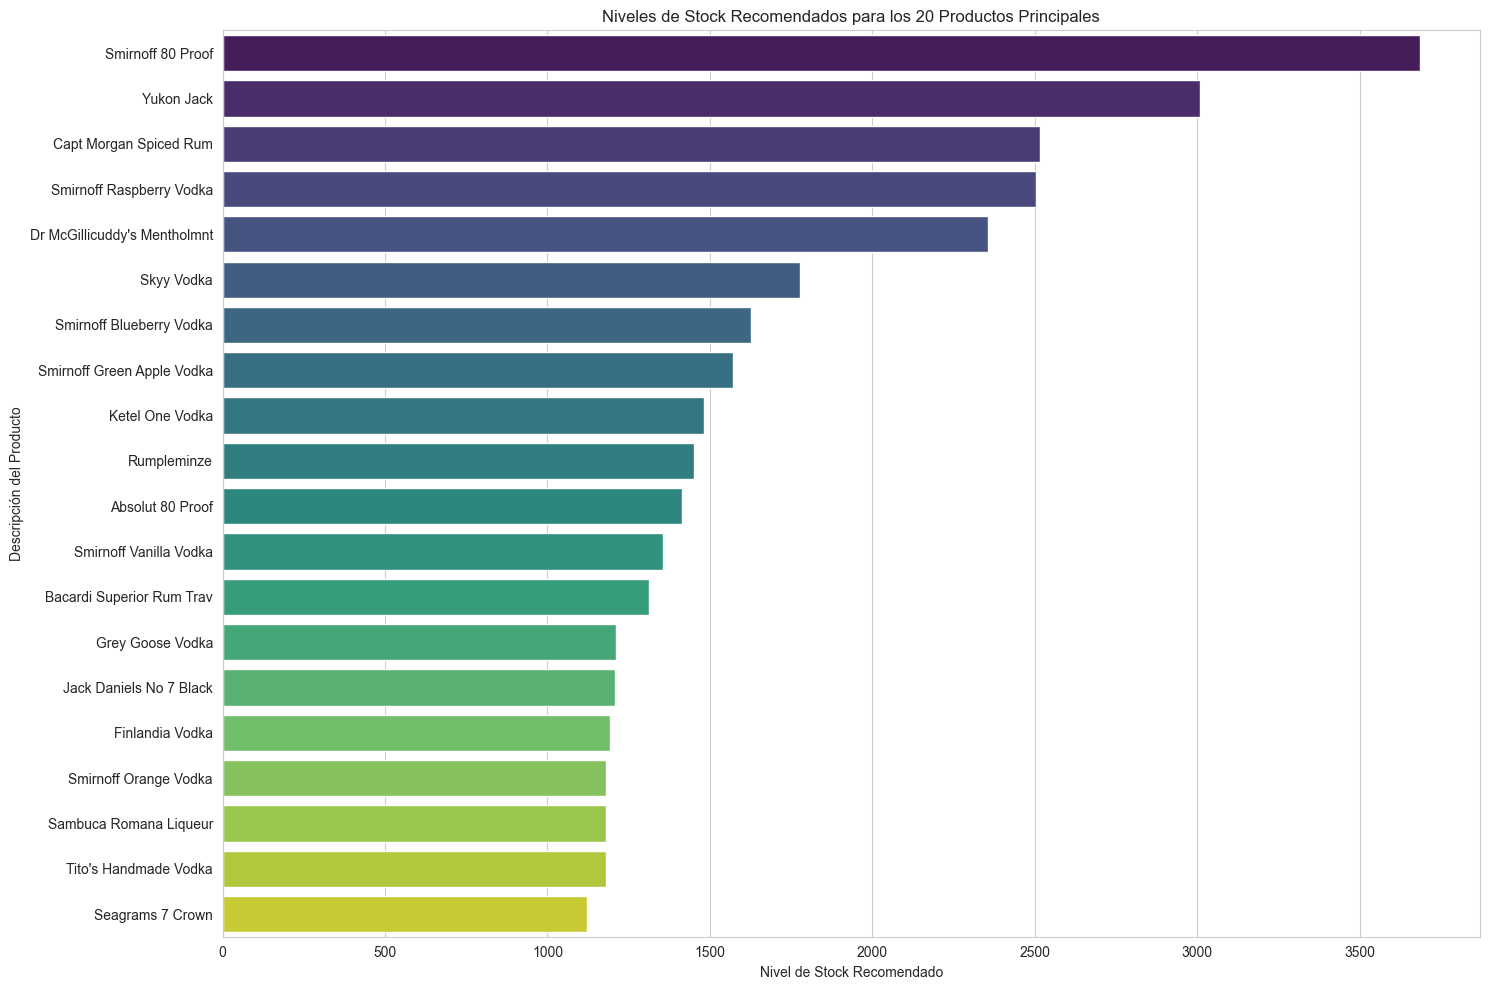

In [38]:
# El gráfico de barras muestra los niveles de stock recomendados para los 20 productos principales (según el nivel de stock recomendado más alto).

# El DataFrame merged_data se ordena en orden descendente según el nivel de stock
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Creación del gráfico de barras
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis', hue='Description', dodge=False, legend=False)
plt.xlabel('Nivel de Stock Recomendado')
plt.ylabel('Descripción del Producto')
plt.title('Niveles de Stock Recomendados para los 20 Productos Principales')
plt.tight_layout()
plt.show()


El gráfico de barras representa visualmente los niveles de stock recomendados para los 20 productos principales. "Smirnoff 80 Proof" destaca como el producto con el nivel de stock sugerido más alto, lo que indica que tiene una alta velocidad de ventas y/o tiempos de entrega más largos. Por el contrario, productos al final del gráfico como "Sambuca Romana Liqueur" tienen niveles de stock recomendados comparativamente más bajos. Esta visualización ayuda en la toma de decisiones rápidas sobre el reabastecimiento y la asignación de inventarios.

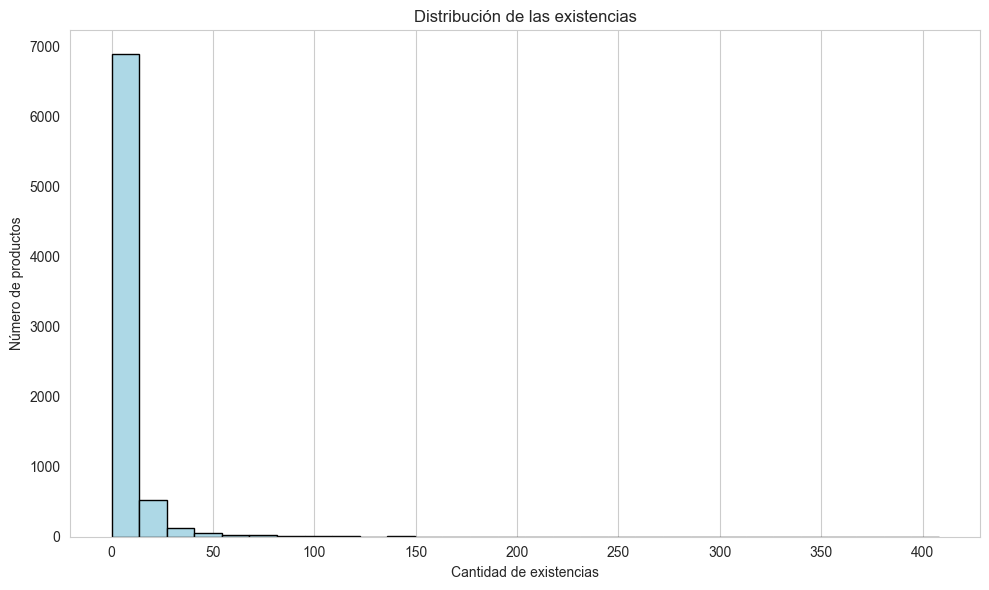

In [43]:
# Trazado del histograma de la distribución de existencias de seguridad
plt.figure(figsize=(10,6))
plt.hist(merged_data['Safety_Stock'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribución de las existencias')
plt.xlabel('Cantidad de existencias')
plt.ylabel('Número de productos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

El histograma ilustra la distribución de las cantidades de stock de seguridad entre los productos. Lo más notable es que una gran mayoría de productos tienen sus cantidades de stock de seguridad agrupadas alrededor de cero. Esto significa que para muchos productos, no hay stock de seguridad o es una cantidad muy mínima.

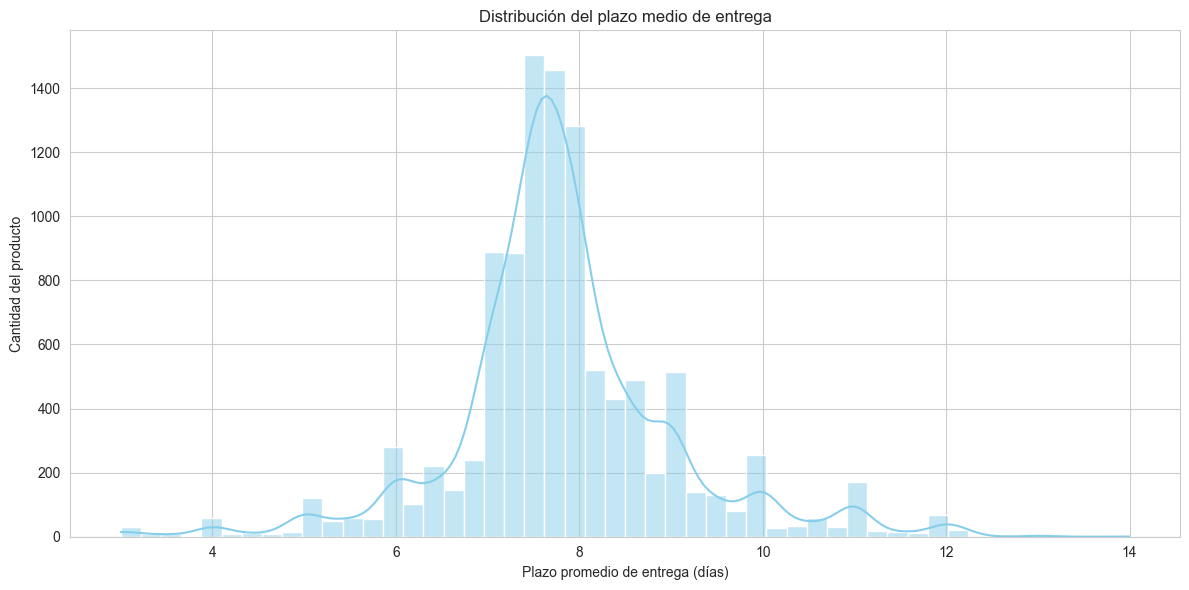

In [46]:
# Configuración de estilo
sns.set_style("whitegrid")

# Creación del histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=lead_times, x='Avg_Lead_Time', bins=50, color='skyblue', kde=True)
plt.title('Distribución del plazo medio de entrega')
plt.xlabel('Plazo promedio de entrega (días)')
plt.ylabel('Cantidad del producto')
plt.tight_layout()  # Asegura que los elementos del gráfico no se superpongan
plt.show()


El histograma ilustra la distribución de los plazos medios de entrega de los productos. El pico en torno a los 8 días sugiere que la mayoría de los productos tienen un plazo medio de aproximadamente 8 días. También hay algunos productos con plazos de entrega más cortos o más largos, como se ve en la dispersión entre 4 y 14 días. La línea suave (Kernel Density Estimation) ofrece una visión más clara de la forma de la distribución, confirmando la concentración en torno a la marca de 8 días.

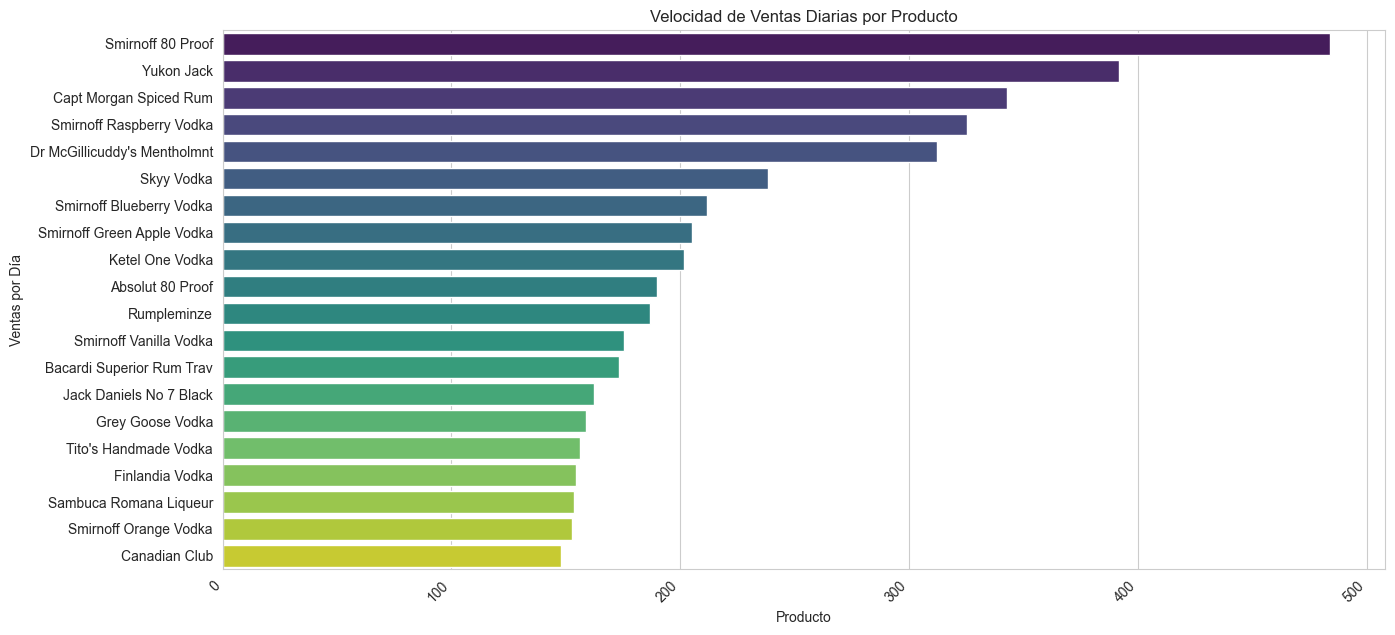

In [44]:
# Ordenando los datos por Sales_Per_Day en orden descendente para obtener los productos principales
top_products = sales_velocity.sort_values(by='Sales_Per_Day', ascending=False).head(20)  # puedes ajustar el número según sea necesario

# Creando el gráfico de barras
plt.figure(figsize=(15, 7))
sns.barplot(x='Sales_Per_Day', y='Description', data=top_products, palette='viridis', hue='Description', dodge=False, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Velocidad de Ventas Diarias por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas por Día')
plt.show()


Este gráfico de barras muestra la velocidad de venta diaria de varios productos. A primera vista, es evidente que «Smirnoff 80 Proof» tiene las mayores ventas diarias, superando significativamente a los demás productos. A medida que nos desplazamos hacia la derecha del gráfico, las ventas diarias de cada producto disminuyen, lo que indica un orden descendente de popularidad o demanda. Los distintos tonos de color, de oscuro a claro, también subrayan esta tendencia decreciente en la velocidad de ventas. Proporciona información valiosa para la gestión de inventarios, ayudando a las empresas a priorizar qué productos deben almacenar con más frecuencia en función de su índice de ventas.

**5. Cálculo del nivel óptimo de existencias**

      Brand                   Description  Current_Stock  \
0        58   Gekkeikan Black & Gold Sake          385.0   
1        60        Canadian Club 1858 VAP          146.0   
2        61         Margaritaville Silver           12.0   
3        62      Herradura Silver Tequila          459.0   
4        63    Herradura Reposado Tequila          442.0   
...     ...                           ...            ...   
7653  90084  Les Fiefs Lagrange St Jul 11            2.0   
7654  90085  Ch Lilian 09 Ladouys St Este            6.0   
7655  90086  La Dame Montrose St Estep 11           32.0   
7656  90087  Ch Mouton Rothschild 12 Paui           45.0   
7657  90089    Ch Lynch Bages 12 Pauillac          124.0   

      Recommended_Stock_Level  Order_Quantity  
0                   39.990104        0.000000  
1                   16.996855        0.000000  
2                   14.894394        2.894394  
3                   20.384988        0.000000  
4                   18.042373        0.

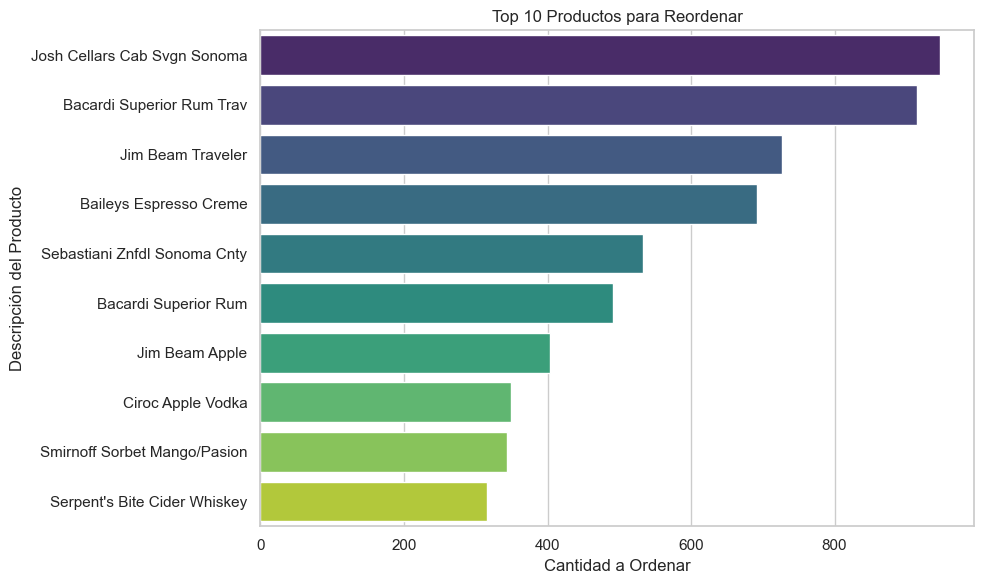

In [51]:
# Convertir la columna 'endDate' a formato de fecha
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])

# Encontrar la fecha más reciente en el inventario final
latest_inventory_date = end_inv['endDate'].max()

# Filtrar el inventario para obtener solo los registros de la fecha más reciente
current_inventory = end_inv[end_inv['endDate'] == latest_inventory_date]

# Resumir los niveles actuales de stock por producto
current_stock_levels = current_inventory.groupby(['Brand', 'Description']).agg(Current_Stock=('onHand', 'sum')).reset_index()

# Fusionar los niveles de stock actuales con los datos calculados previamente
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')

# Asumir stock actual de cero para cualquier producto no presente en el inventario actual
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)

# Calcular cuántos productos deben ordenarse si el stock actual está por debajo de los niveles recomendados
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)  # Ajustar las cantidades de orden negativas a cero

# Reportar los resultados
print(final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']])



# Configuración de estilo con Seaborn
sns.set(style="whitegrid")

# Creación de la figura del gráfico
plt.figure(figsize=(10, 6))

# Creación del gráfico de barras
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10), palette='viridis', hue='Description', dodge=False, legend=False)

# Configuración del título y las etiquetas de los ejes
plt.title('Top 10 Productos para Reordenar')
plt.xlabel('Cantidad a Ordenar')
plt.ylabel('Descripción del Producto')

# Ajuste del diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()




El gráfico de barras muestra los 10 productos principales que necesitan ser reordenados según los datos de inventario. Los productos están ordenados por la cantidad que necesita ser ordenada, la cual se determina por la diferencia entre los niveles de stock recomendados y el stock actual disponible. Si el stock actual está por debajo del nivel recomendado, el producto aparece en la lista con la cantidad a ordenar representada en el eje x.

Del gráfico, podemos observar lo siguiente:

* El producto "Josh Cellars Cab Svgn Sonoma" tiene la mayor cantidad a reordenar, acercándose a las 800 unidades..
* "Bacardi Superior Rum Trav" y "Jim Beam Traveler" le siguen con una cantidad ligeramente menor a ordenar, ambos cerca o por encima de las 600 unidades.
* Otros productos como "Baileys Espresso Creme" y "Sebastiani Znfdl Sonoma Cnty" están en el rango medio con cantidades a ordenar alrededor de 400 unidades.
* El producto con la menor cantidad a reordenar entre los 10 principales es "Serpent's Bite Cider Whiskey", que está justo por debajo de las 200 unidades.


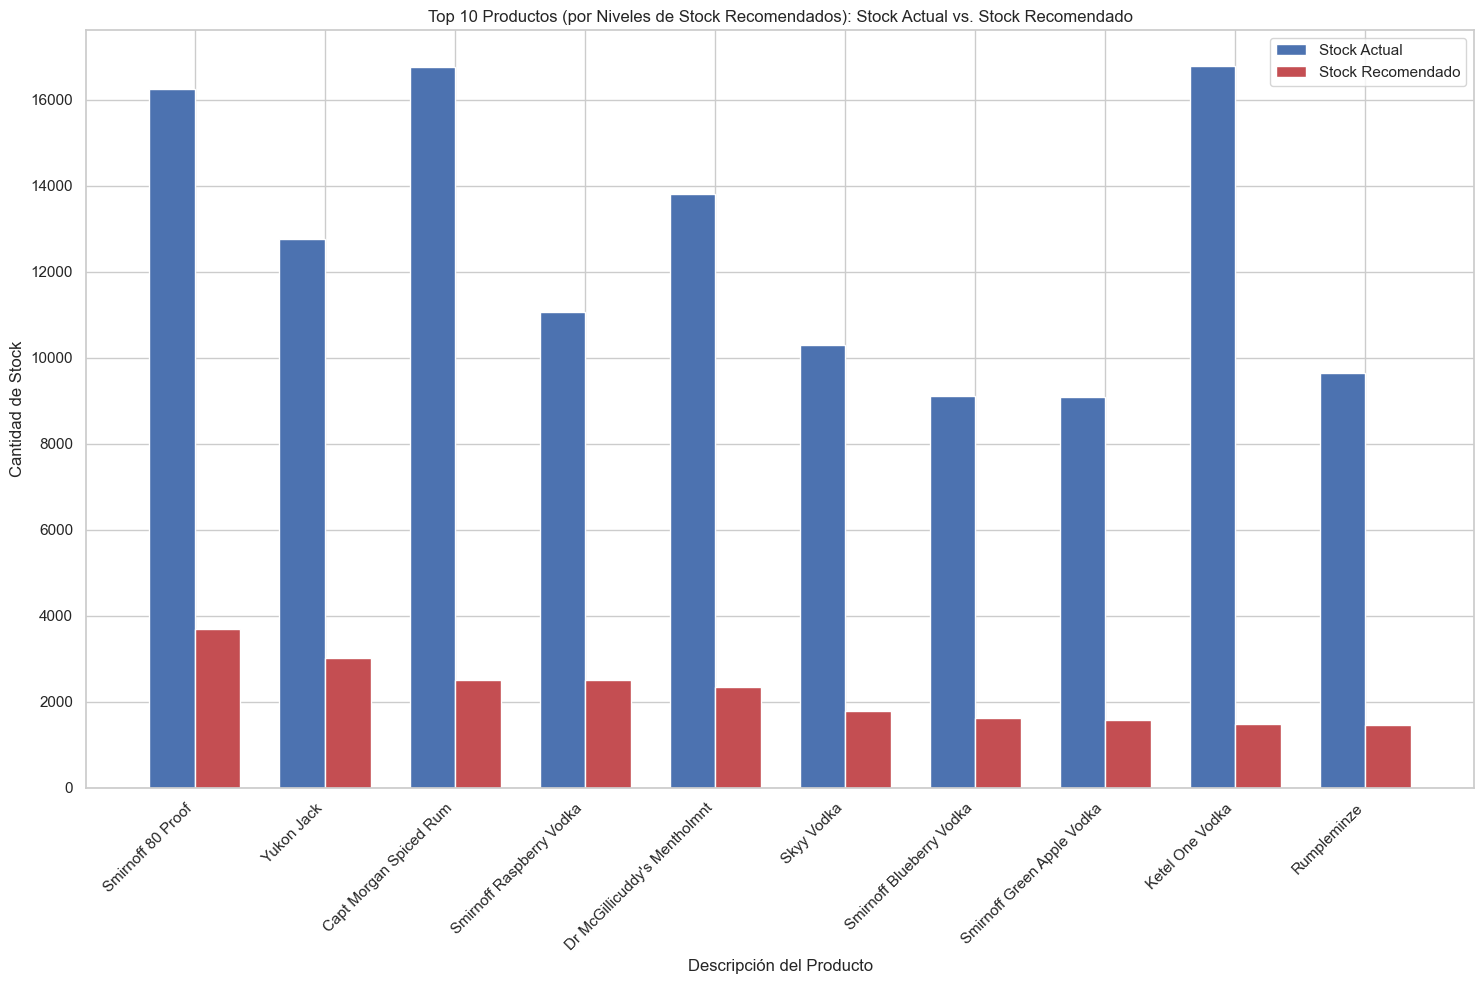

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Ordenar los productos por nivel de stock recomendado
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # Para mostrar los 10 productos principales

# Crear un gráfico de barras doble
bar_width = 0.35
index = np.arange(len(sorted_data))

plt.figure(figsize=(15, 10))

# Barras de stock actual
bar1 = plt.bar(index, sorted_data['Current_Stock'], bar_width, label='Stock Actual', color='b')

# Barras de stock recomendado
bar2 = plt.bar(index + bar_width, sorted_data['Recommended_Stock_Level'], bar_width, label='Stock Recomendado', color='r')

# Configuración de las etiquetas y el título
plt.xlabel('Descripción del Producto')
plt.ylabel('Cantidad de Stock')
plt.title('Top 10 Productos (por Niveles de Stock Recomendados): Stock Actual vs. Stock Recomendado')
plt.xticks(index + bar_width / 2, sorted_data['Description'], rotation=45, ha='right')
plt.legend()

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()





**Esta revisión de inventario resalta un excedente significativo en los niveles de stock actuales en comparación con los niveles de stock recomendados para los 10 productos principales, ordenados por la cantidad recomendada.** Notablemente, "Ketel One Vodka" y "Rumpleminze" muestran un exceso pronunciado más allá del inventario sugerido, lo que sugiere ineficiencias en la gestión de stock. La presencia de cantidades de stock que superan los niveles recomendados en todos los artículos observados puede llevar a costos de mantenimiento más altos y al riesgo de que el stock se vuelva obsoleto. Se aconsejan medidas inmediatas como revisar las órdenes de compra y alinearlas con las proyecciones de ventas para mitigar los riesgos asociados con el exceso de stock y optimizar la tasa de rotación de inventario.

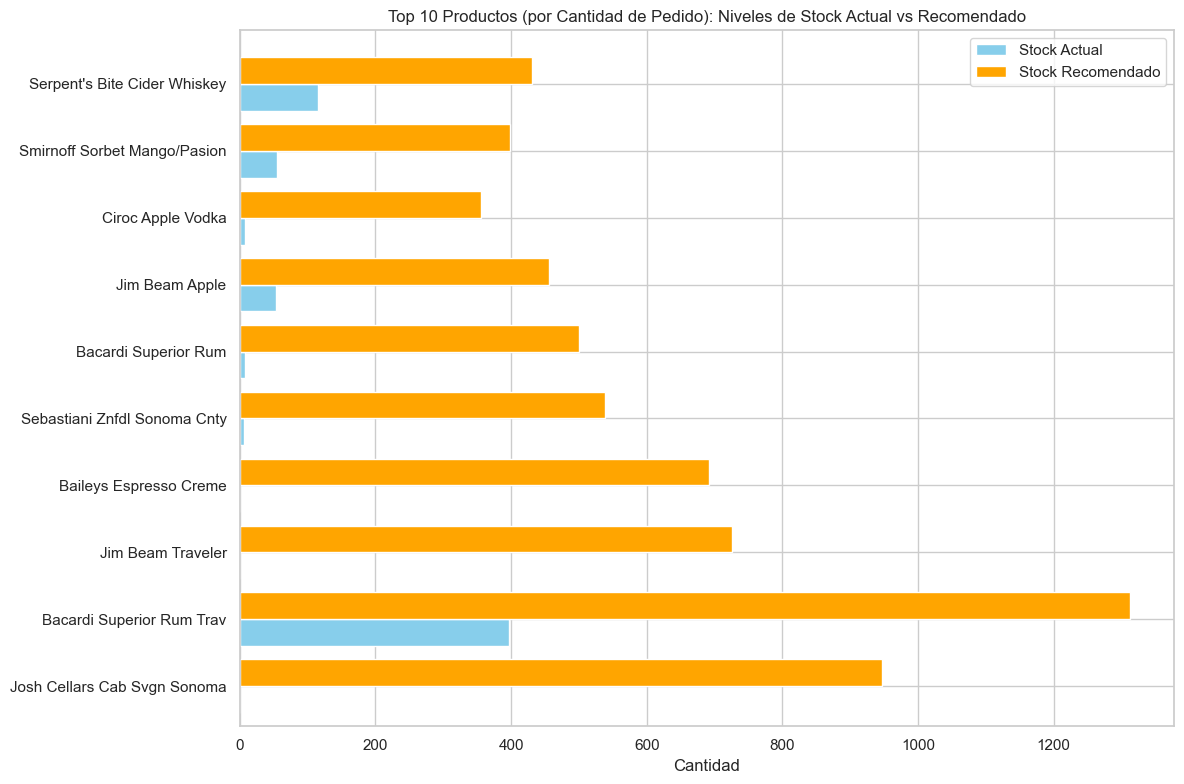

In [55]:
# Filtrar los datos para mostrar los 10 productos principales donde la cantidad de pedido es más alta
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

# Índices para las barras
ind = np.arange(len(top_products_to_order))

# Ancho de las barras
bar_width = 0.4

# Graficar stock actual y stock recomendado lado a lado
ax.barh(ind, top_products_to_order['Current_Stock'], bar_width, color='skyblue', label='Stock Actual')
ax.barh(ind + bar_width, top_products_to_order['Recommended_Stock_Level'], bar_width, color='orange', label='Stock Recomendado')

# Configuración de las etiquetas del eje y con descripciones de los productos
ax.set(yticks=ind + bar_width / 2, yticklabels=top_products_to_order['Description'], ylim=[-bar_width, len(ind)])

# Agregar la leyenda
ax.legend()

# Agregar etiquetas y título
ax.set_xlabel('Cantidad')
ax.set_title('Top 10 Productos (por Cantidad de Pedido): Niveles de Stock Actual vs Recomendado')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()




El gráfico titulado "Top 10 Productos (por Cantidad de Pedido): Niveles de Stock Actual vs Recomendado" muestra que para los 10 productos más vendidos, el stock actual (azul) está por debajo de los niveles de stock recomendados (naranja), lo que indica la necesidad de reabastecimiento para cumplir con el inventario sugerido.

**Conclusion**

**Productos Principales y Tendencias::**  
* **"Ketel One Vodka" ascendió del cuarto lugar al primero, insinuando una creciente demanda.**
* "Capt Morgan Spiced Rum" terminó en un cerrado segundo lugar, solo una unidad por detrás.
* "Smirnoff 80 Proof" mantuvo su posición a pesar de un rebranding (*proceso de cambiar la imagen de una marca*), cambiando de número de 3876 a 8111.
* "Absolut 80 Proof" bajó ligeramente en el ranking, pero se mantuvo fuerte.
* El recién llegado "Jack Daniels No 7 Black" se introdujo en el top 5.  

**Desafíos de Inventario:**
* **Los artículos con inventario cero al inicio y al final del año sugieren problemas de abastecimiento o demanda.**
* Los artículos con bajo stock muestran niveles de inventario impredecibles.
* **Los artículos especiales, como algunos vinos selectos, permanecen en el fondo, indicando una demanda de nicho.**

**Perspectivas de Gestión de Inventario:**
* La fuerte consistencia en los productos principales refleja una sólida previsión de la demanda y el reabastecimiento.
* Los niveles de stock cero recurrentes podrían indicar fallos más profundos en la adquisición de inventario.
* Las ventas alcanzaron un pico notable el 25 de enero, luego se estabilizaron en febrero.
* **DIAGEO NORTH AMERICA INC dominó las compras de proveedores** con $3.9 millones, significativamente por delante de otros.
* **La duración promedio de suministro es de 7.6 días, pero el pago promedio se extiende a 35.6 días.**


**Puntos de Datos Operativos:**  
* Se realizaron correcciones de datos para 555 productos para alinear Max_Daily_Sales con Sales_Per_Day.
* **"Smirnoff 80 Proof" lidera los niveles de stock recomendados.**
* La mayoría de los productos tienen un stock de seguridad mínimo, lo que implica un control estricto del inventario.
* **Los plazos de entrega alcanzan su punto máximo alrededor de los 8 días.**
* La velocidad de ventas diaria muestra a "Smirnoff 80 Proof" muy por delante, enfatizando su alta demanda.

**Estrategias de Abastecimiento:**
* "Josh Cellars Cab Svgn Sonoma" requiere la mayor cantidad de reabastecimiento, casi 800 unidades.
* **Para los diez productos principales con los niveles de stock recomendados más altos, los niveles de stock actuales aún superan los niveles recomendados, lo que sugiere un exceso de inventario y la necesidad de un ajuste en el inventario.**
*  Hay una clara necesidad de reabastecer el inventario de los 10 productos más pedidos para cumplir con los niveles de stock recomendados y asegurar un suministro adecuado para satisfacer la demanda.
* En esencia, los licores más vendidos demuestran una fuerte demanda en el mercado con rotaciones de inventario efectivas, mientras que los artículos con stock cero y los productos de nicho presentan oportunidades para la optimización del inventario. Un evento de ventas significativo ocurre a finales de enero, y los términos de pago a los proveedores pueden requerir revisión. Se están abordando las discrepancias de inventario, y es evidente un enfoque en productos de alta velocidad como "Smirnoff 80 Proof". La estrategia incluye refinar las prácticas de reabastecimiento para evitar el exceso de inventario y los costos asociados.